# Rossmann Sales Prediction - Exploratory Data Analysis

## Introduction
This notebook contains a comprehensive analysis of the Rossmann Pharmaceuticals sales data. As a Machine Learning Engineer at Rossmann, our goal is to understand customer purchasing behavior and various factors affecting sales across our stores.

## Table of Contents
1. Setup and Data Loading
2. Data Cleaning and Preprocessing
3. Promotion Analysis
4. Holiday Impact Analysis
5. Seasonal Patterns
6. Sales and Customer Correlation
7. Promotion Effectiveness
8. Store Operations Analysis
9. Assortment Impact
10. Competition Analysis
11. Key Insights and Recommendations

In [1]:
# Import necessary libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import logging
import yaml

from src.data.data_loader import RossmannDataLoader
from src.data.analysis_utils import RossmannAnalyzer

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

sns.set_palette('husl')

# Configure plot settings
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

## 1. Data Loading and Initial Exploration

In [2]:
# Initialize data loader
data_loader = RossmannDataLoader()

# Load data
train_df, test_df = data_loader.load_data()
store_df = data_loader.load_store_data()

# Merge store data with training data
df = data_loader.merge_store_data(train_df, store_df)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

c:\Users\hp\Desktop\rossmann-sales-prediction\notebooks\..\src\data\data_loader.py:52: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, parse_dates=['Date'])
INFO:src.data.data_loader:Successfully loaded training and test data
INFO:src.data.data_loader:Successfully loaded store data
INFO:src.data.data_loader:Successfully merged training and store data


Dataset Shape: (1017209, 18)

Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Data Types:
 Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceW

## 2. Data Cleaning and Preprocessing

c:\Users\hp\Desktop\rossmann-sales-prediction\notebooks\..\src\data\data_loader.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
c:\Users\hp\Desktop\rossmann-sales-prediction\notebooks\..\src\data\data_loader.py:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

Number of sales outliers: 26694


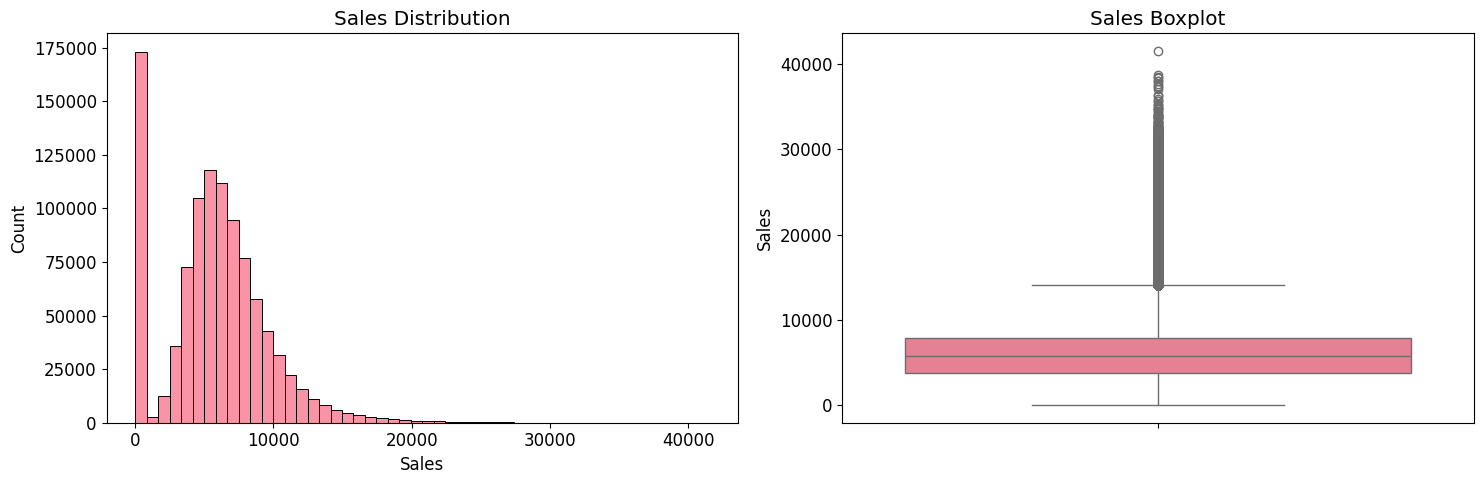

In [3]:
# Handle missing values
df = data_loader.handle_missing_values(df)

# Create date features
df = data_loader.create_date_features(df)

# Check for outliers in sales
sales_outliers = data_loader.detect_outliers(df, 'Sales')
print(f"Number of sales outliers: {sales_outliers.sum()}")

# Visualize sales distribution
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Sales', bins=50)
plt.title('Sales Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Sales')
plt.title('Sales Boxplot')

plt.tight_layout()
plt.show()

## 3. Promotion Analysis

INFO:src.data.analysis_utils:Completed promotion analysis


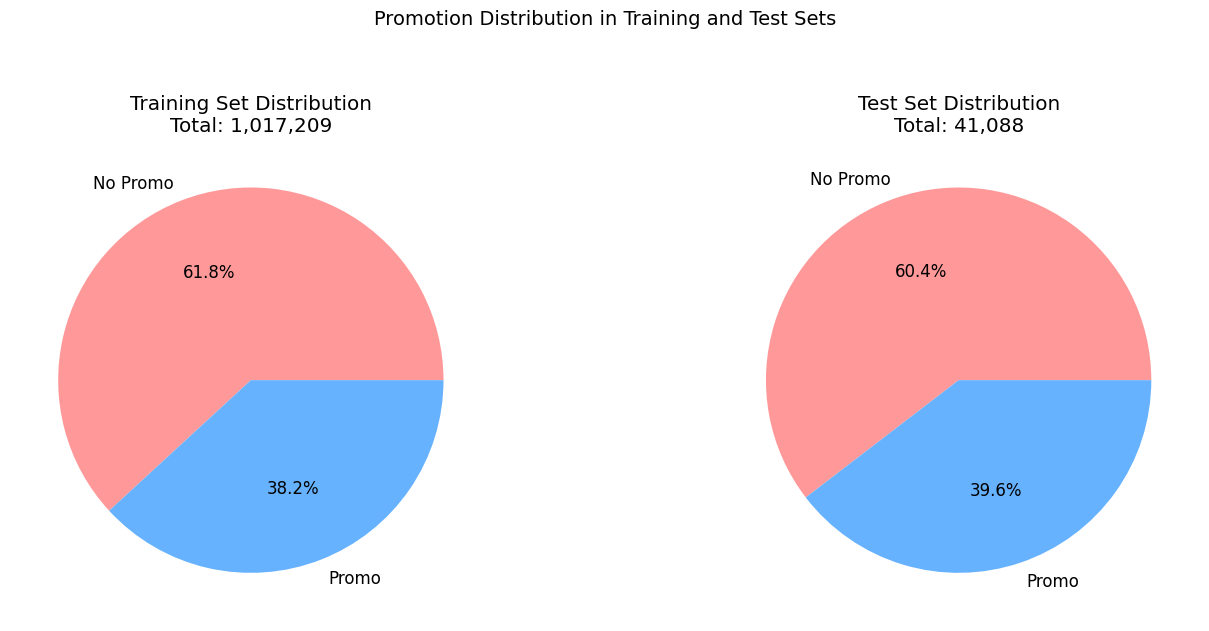


Promotion Distribution Statistics:

Training Set:
No Promo: 629,129 (61.8%)
Promo: 388,080 (38.2%)

Test Set:
No Promo: 24,824 (60.4%)
Promo: 16,264 (39.6%)

Chi-square test for distribution similarity:
Chi-square statistic: 34.24
p-value: 0.0000
Degrees of freedom: 1

Interpretation:
The promotion distributions in training and test sets are significantly different (p < 0.05)


In [4]:
# Analyze promotions
promo_stats = RossmannAnalyzer.analyze_promotions(train_df, test_df)

# Create two separate pie charts side by side
fig = plt.figure(figsize=(15, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.pie(list(promo_stats['train_promo_dist'].values()),
        labels=['No Promo', 'Promo'],
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'])
plt.title(f"Training Set Distribution\nTotal: {sum(promo_stats['train_promo_count'].values()):,}")

# Test Set
plt.subplot(1, 2, 2)
plt.pie(list(promo_stats['test_promo_dist'].values()),
        labels=['No Promo', 'Promo'],
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'])
plt.title(f"Test Set Distribution\nTotal: {sum(promo_stats['test_promo_count'].values()):,}")

plt.suptitle('Promotion Distribution in Training and Test Sets', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPromotion Distribution Statistics:")
print("\nTraining Set:")
for label, value in promo_stats['train_promo_count'].items():
    percentage = promo_stats['train_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

print("\nTest Set:")
for label, value in promo_stats['test_promo_count'].items():
    percentage = promo_stats['test_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

# Chi-square test for distribution similarity
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.DataFrame({
    'Training': promo_stats['train_promo_count'],
    'Test': promo_stats['test_promo_count']
})

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test for distribution similarity:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nInterpretation:")
if p_value < 0.05:
    print("The promotion distributions in training and test sets are significantly different (p < 0.05)")
else:
    print("The promotion distributions in training and test sets are not significantly different (p >= 0.05)")

## 4. Holiday Impact Analysis

INFO:src.data.analysis_utils:Completed holiday sales analysis


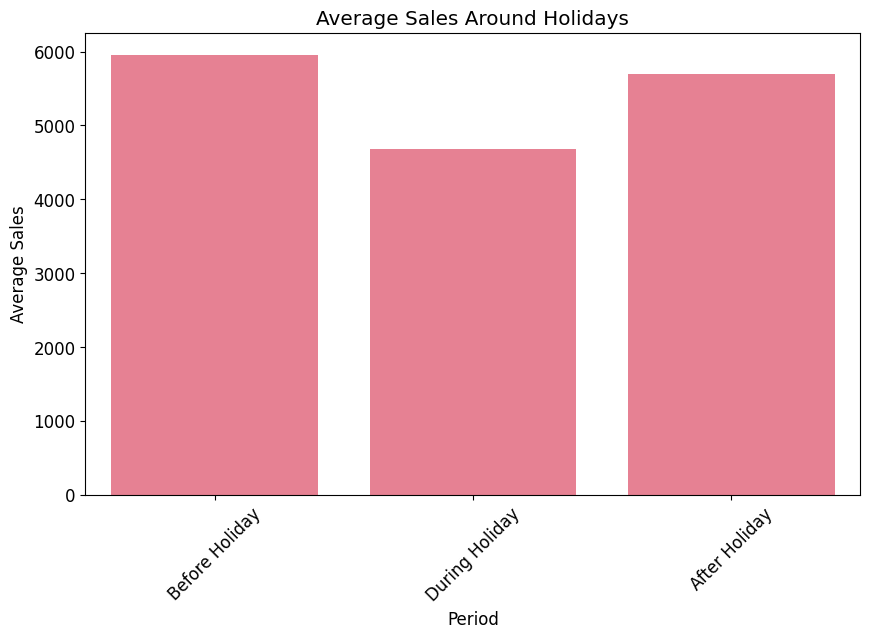

In [5]:
# Analyze holiday sales
holiday_stats = RossmannAnalyzer.analyze_holiday_sales(df)

# Visualize sales around holidays
holiday_sales = pd.DataFrame({
    'Period': ['Before Holiday', 'During Holiday', 'After Holiday'],
    'Average Sales': [
        holiday_stats['before_holiday_avg'],
        df[df['StateHoliday'] != '0']['Sales'].mean(),
        holiday_stats['after_holiday_avg']
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_sales, x='Period', y='Average Sales')
plt.title('Average Sales Around Holidays')
plt.xticks(rotation=45)
plt.show()

## 5. Seasonal Patterns

INFO:src.data.analysis_utils:Completed seasonal pattern analysis
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


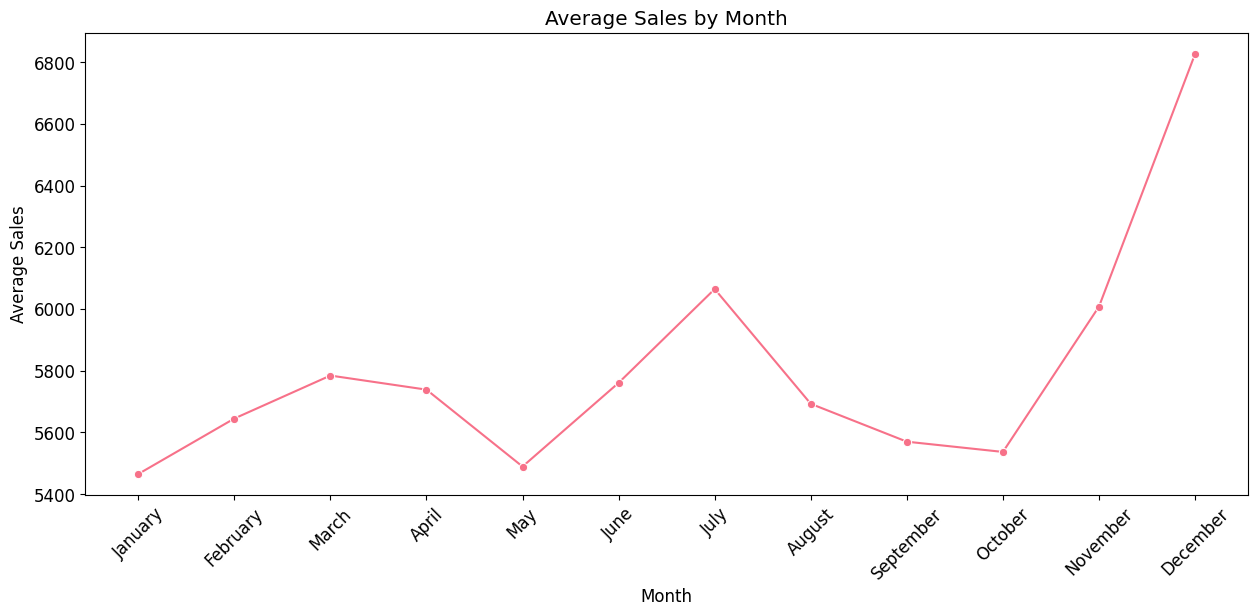

In [6]:
# Analyze seasonal patterns
seasonal_stats = RossmannAnalyzer.analyze_seasonal_patterns(df)

# Visualize monthly patterns
monthly_sales = pd.DataFrame(seasonal_stats['monthly_stats']['mean'].items(), 
                           columns=['Month', 'Average Sales'])
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'], format='%m').dt.strftime('%B')

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Average Sales', marker='o')
plt.title('Average Sales by Month')
plt.xticks(rotation=45)
plt.show()

## 6. Sales and Customer Correlation

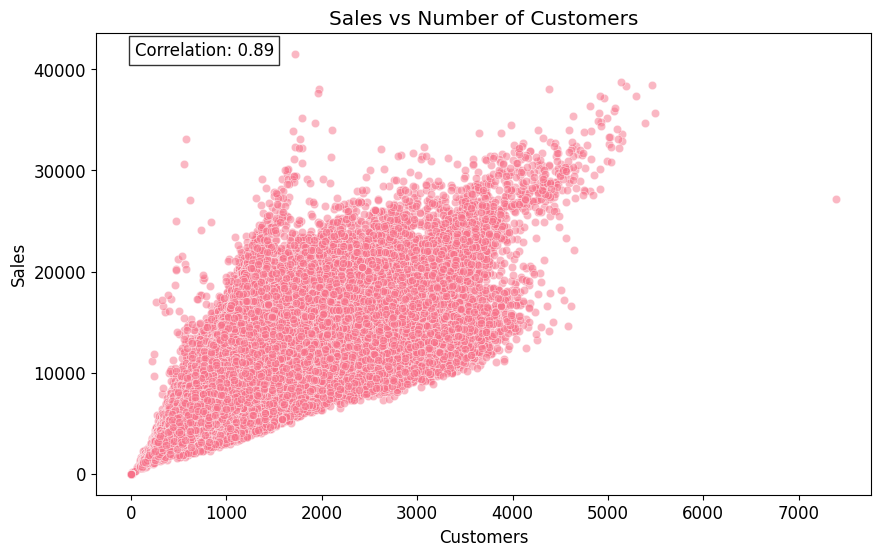

In [7]:
# Analyze sales-customer correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Customers', y='Sales', alpha=0.5)
plt.title('Sales vs Number of Customers')

# Add correlation coefficient
correlation = df['Sales'].corr(df['Customers'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

## 7. Promotion Effectiveness

In [8]:
# Analyze promotions
promo_stats = RossmannAnalyzer.analyze_promotions(train_df, test_df)

# Create two separate figures for training and test sets
fig_train = go.Figure(data=[go.Pie(
    labels=['No Promo', 'Promo'],
    values=list(promo_stats['train_promo_dist'].values()),
    title='Training Set',
    hole=0.3,
    marker=dict(colors=['#FF9999', '#66B2FF'])
)])

fig_test = go.Figure(data=[go.Pie(
    labels=['No Promo', 'Promo'],
    values=list(promo_stats['test_promo_dist'].values()),
    title='Test Set',
    hole=0.3,
    marker=dict(colors=['#FF9999', '#66B2FF'])
)])

# Update layout for both figures
for fig in [fig_train, fig_test]:
    fig.update_layout(
        showlegend=True,
        height=400,
        width=500,
        annotations=[
            dict(
                text=f"Total: {sum(promo_stats['train_promo_count'].values()):,}" if fig == fig_train else f"Total: {sum(promo_stats['test_promo_count'].values()):,}",
                x=0.5, y=-0.2,
                showarrow=False
            )
        ]
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')

# Display figures
fig_train.show()
fig_test.show()

# Print detailed statistics
print("\nPromotion Distribution Statistics:")
print("\nTraining Set:")
for label, value in promo_stats['train_promo_count'].items():
    percentage = promo_stats['train_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

print("\nTest Set:")
for label, value in promo_stats['test_promo_count'].items():
    percentage = promo_stats['test_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

# Chi-square test for distribution similarity
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.DataFrame({
    'Training': promo_stats['train_promo_count'],
    'Test': promo_stats['test_promo_count']
})

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test for distribution similarity:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nInterpretation:")
if p_value < 0.05:
    print("The promotion distributions in training and test sets are significantly different (p < 0.05)")
else:
    print("The promotion distributions in training and test sets are not significantly different (p >= 0.05)")

INFO:src.data.analysis_utils:Completed promotion analysis



Promotion Distribution Statistics:

Training Set:
No Promo: 629,129 (61.8%)
Promo: 388,080 (38.2%)

Test Set:
No Promo: 24,824 (60.4%)
Promo: 16,264 (39.6%)

Chi-square test for distribution similarity:
Chi-square statistic: 34.24
p-value: 0.0000
Degrees of freedom: 1

Interpretation:
The promotion distributions in training and test sets are significantly different (p < 0.05)


INFO:src.data.analysis_utils:Completed promotion analysis


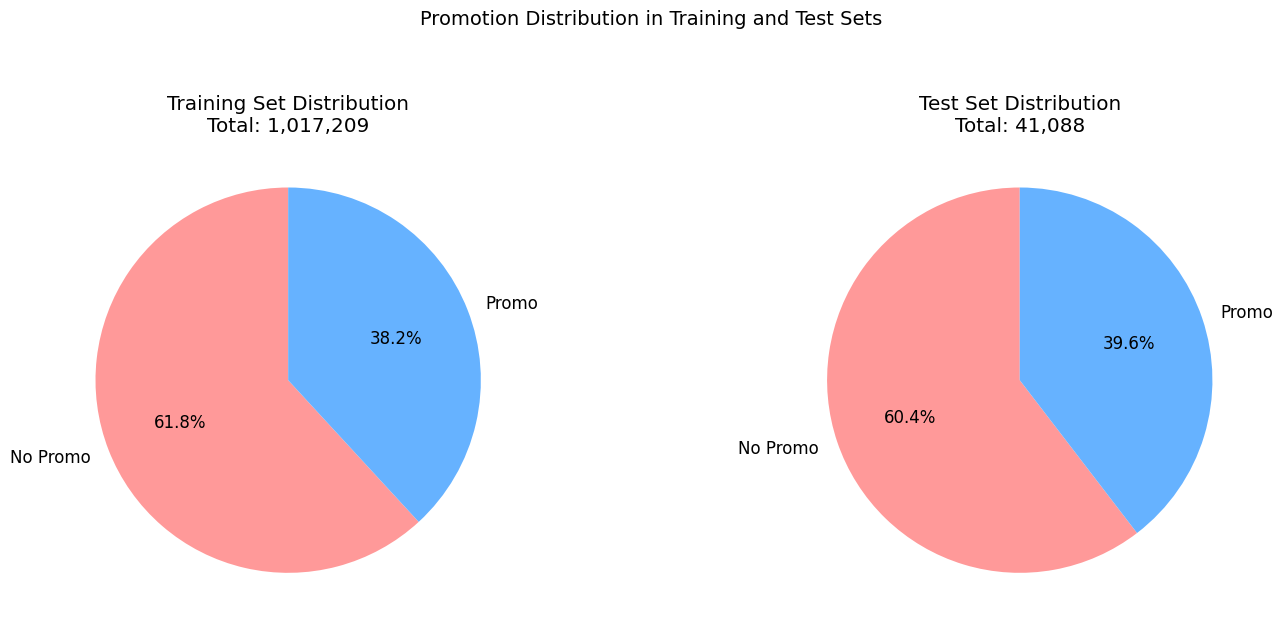


Promotion Distribution Statistics:

Training Set:
No Promo: 629,129 (61.8%)
Promo: 388,080 (38.2%)

Test Set:
No Promo: 24,824 (60.4%)
Promo: 16,264 (39.6%)

Chi-square test for distribution similarity:
Chi-square statistic: 34.24
p-value: 0.0000
Degrees of freedom: 1

Interpretation:
The promotion distributions in training and test sets are significantly different (p < 0.05)


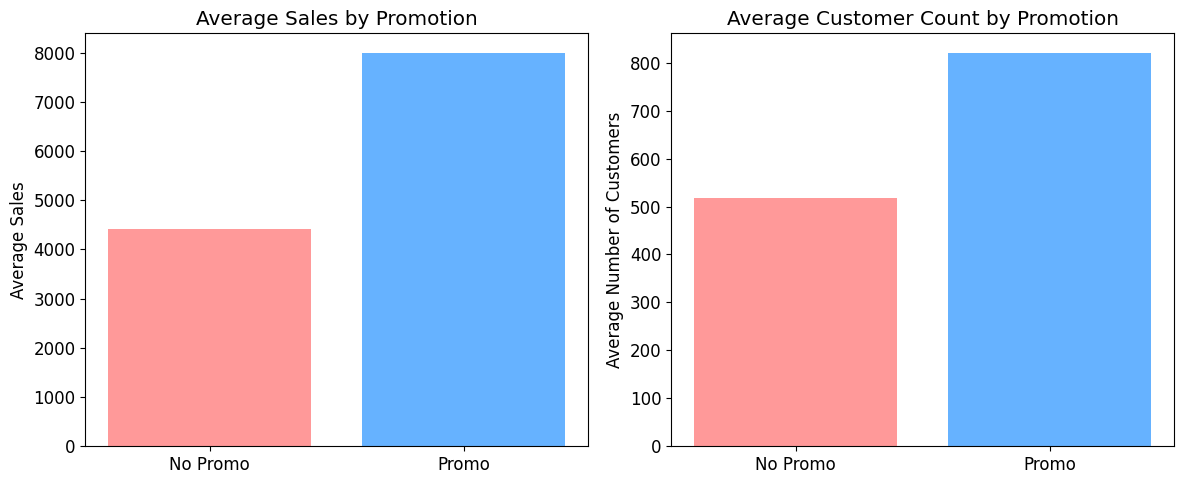


Promotion Effectiveness Statistics:

Average Sales:
No Promo: 4,406.05
Promo: 7,991.15

Average Customer Count:
No Promo: 517.82
Promo: 820.10

Promotion Impact:
Sales Increase: 81.4%
Customer Count Increase: 58.4%


In [9]:
# Analyze promotions
promo_stats = RossmannAnalyzer.analyze_promotions(train_df, test_df)

# Create figure and subplots
plt.figure(figsize=(15, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.pie(
    list(promo_stats['train_promo_dist'].values()),
    labels=['No Promo', 'Promo'],
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B2FF'],
    startangle=90
)
plt.title(f'Training Set Distribution\nTotal: {sum(promo_stats["train_promo_count"].values()):,}')

# Test Set
plt.subplot(1, 2, 2)
plt.pie(
    list(promo_stats['test_promo_dist'].values()),
    labels=['No Promo', 'Promo'],
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B2FF'],
    startangle=90
)
plt.title(f'Test Set Distribution\nTotal: {sum(promo_stats["test_promo_count"].values()):,}')

plt.suptitle('Promotion Distribution in Training and Test Sets', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nPromotion Distribution Statistics:")
print("\nTraining Set:")
for label, value in promo_stats['train_promo_count'].items():
    percentage = promo_stats['train_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

print("\nTest Set:")
for label, value in promo_stats['test_promo_count'].items():
    percentage = promo_stats['test_promo_dist'][label] * 100
    print(f"{'Promo' if label == 1 else 'No Promo'}: {value:,} ({percentage:.1f}%)")

# Chi-square test for distribution similarity
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.DataFrame({
    'Training': promo_stats['train_promo_count'],
    'Test': promo_stats['test_promo_count']
})

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test for distribution similarity:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nInterpretation:")
if p_value < 0.05:
    print("The promotion distributions in training and test sets are significantly different (p < 0.05)")
else:
    print("The promotion distributions in training and test sets are not significantly different (p >= 0.05)")

# Create a bar plot comparing promotion impact on sales
plt.figure(figsize=(12, 5))

# Sales during promotions
plt.subplot(1, 2, 1)
sales_data = df.groupby('Promo')['Sales'].mean()
plt.bar(['No Promo', 'Promo'], sales_data, color=['#FF9999', '#66B2FF'])
plt.title('Average Sales by Promotion')
plt.ylabel('Average Sales')

# Customer count during promotions
plt.subplot(1, 2, 2)
customer_data = df.groupby('Promo')['Customers'].mean()
plt.bar(['No Promo', 'Promo'], customer_data, color=['#FF9999', '#66B2FF'])
plt.title('Average Customer Count by Promotion')
plt.ylabel('Average Number of Customers')

plt.tight_layout()
plt.show()

# Print promotion effectiveness statistics
print("\nPromotion Effectiveness Statistics:")
print("\nAverage Sales:")
for promo in [0, 1]:
    print(f"{'Promo' if promo == 1 else 'No Promo'}: {sales_data[promo]:,.2f}")
print("\nAverage Customer Count:")
for promo in [0, 1]:
    print(f"{'Promo' if promo == 1 else 'No Promo'}: {customer_data[promo]:,.2f}")

# Calculate and print percentage increase
sales_increase = ((sales_data[1] - sales_data[0]) / sales_data[0]) * 100
customer_increase = ((customer_data[1] - customer_data[0]) / customer_data[0]) * 100

print(f"\nPromotion Impact:")
print(f"Sales Increase: {sales_increase:.1f}%")
print(f"Customer Count Increase: {customer_increase:.1f}%")

## 8. Store Operations Analysis

INFO:src.data.analysis_utils:Completed store pattern analysis


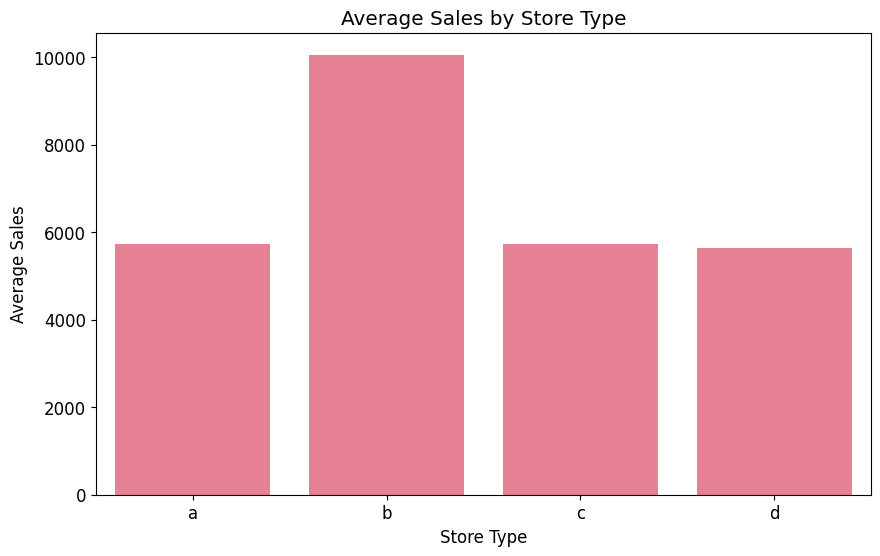

In [11]:
# Analyze store patterns
store_patterns = RossmannAnalyzer.analyze_store_patterns(df)

# Visualize sales by store type
store_type_sales = pd.DataFrame(store_patterns['store_type_stats']['mean'].items(),
                               columns=['Store Type', 'Average Sales'])

plt.figure(figsize=(10, 6))
sns.barplot(data=store_type_sales, x='Store Type', y='Average Sales')
plt.title('Average Sales by Store Type')
plt.show()

## 9. Competition Analysis

c:\Users\hp\Desktop\rossmann-sales-prediction\notebooks\..\src\data\analysis_utils.py:142: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

INFO:src.data.analysis_utils:Completed competition impact analysis


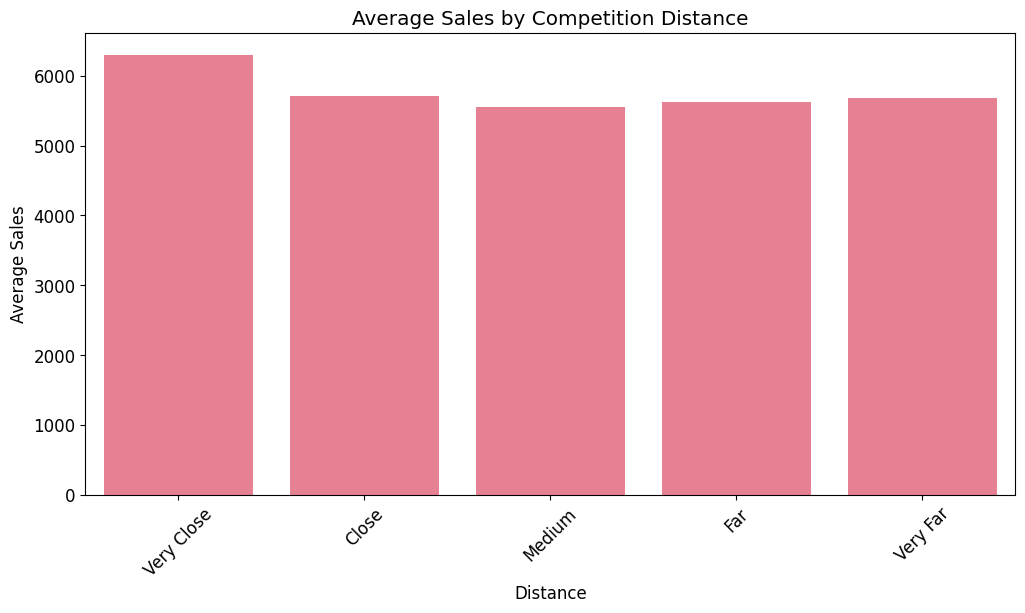

In [12]:
# Analyze competition impact
competition_impact = RossmannAnalyzer.analyze_competition_impact(df)

# Visualize sales by competition distance
distance_sales = pd.DataFrame(competition_impact['distance_stats']['mean'].items(),
                             columns=['Distance', 'Average Sales'])

plt.figure(figsize=(12, 6))
sns.barplot(data=distance_sales, x='Distance', y='Average Sales')
plt.title('Average Sales by Competition Distance')
plt.xticks(rotation=45)
plt.show()